#### Project Introduction:

In today's competitive job market, Human Resources (HR) departments face the challenge of attracting top talent while maintaining cost-effectiveness in compensation packages. To address this challenge, our project aims to develop a predictive model using linear regression to assist HR in estimating the appropriate salary to offer potential job applicants based on their years of experience, test scores, and interview scores.

#### Problem Statement:

HR departments often struggle to determine suitable salary offers for prospective employees. Traditional methods of salary determination may lack objectivity and fail to account for key factors influencing an individual's worth to the organization. Consequently, this can lead to inefficiencies in recruitment processes, with the risk of either underpaying qualified candidates, potentially losing them to competitors, or overpaying, thereby increasing operational costs.

#### Objective:

The primary objective of this project is to develop a robust linear regression model that leverages candidates' years of experience, test scores, and interview scores to predict the appropriate salary range for new hires. By doing so, HR professionals can make more informed decisions regarding compensation, ensuring alignment between salary offers and candidates' qualifications and market standards.

#### Approach:

Data Collection: Gather historical data on past hires, including their years of experience, test scores, interview scores, and corresponding salaries. This dataset will serve as the foundation for training and validating our predictive model.

Data Preprocessing: Cleanse and preprocess the collected data, handling any missing values, outliers, or inconsistencies. Standardize numerical features if necessary to ensure comparability.

Model Development: Utilize linear regression as the primary modeling technique, with salary as the dependent variable and years of experience, test scores, and interview scores as independent variables. Train the model using the prepared dataset.

Model Evaluation: Assess the performance of the linear regression model using appropriate evaluation metrics such as mean squared error (MSE) or R-squared. Validate the model's accuracy and generalization ability through cross-validation techniques.

Deployment and Integration: Integrate the trained model into HR systems or tools, allowing HR professionals to input candidate details and receive salary predictions in real-time during the hiring process.

#### Expected Outcomes:

By the end of this project, we anticipate delivering a reliable and interpretable linear regression model that HR departments can utilize to streamline their salary determination process. This predictive tool will enhance HR decision-making, facilitate fair and competitive salary offers, and ultimately contribute to attracting and retaining top talent within the organization.

In [2]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install word2number
from word2number import w2n
from sklearn.linear_model import LinearRegression

In [3]:
# import the dataset

hr = pd.read_csv('hiring.csv')
hr.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [4]:
# find missing values

hr.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [5]:
# fill in the missing values in the experience column

hr.experience = hr.experience.fillna('one')
hr.experience.head()

0      one
1      one
2     five
3      two
4    seven
Name: experience, dtype: object

In [6]:
# you can also write the code above as
# hr['experience'] = hr['experience'].fillna('one')

In [7]:
# fill the missing values in test scores column with the median

hr['test_score(out of 10)'].fillna(hr['test_score(out of 10)'].median(), inplace=True)

In [8]:
# reconfirm that all numm values have been filled
hr.isnull().sum()

experience                    0
test_score(out of 10)         0
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [9]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  8 non-null      object 
 1   test_score(out of 10)       8 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes


In [10]:
# we need to convert the experience column to numeric

hr.experience =hr.experience.apply(w2n.word_to_num)
hr.experience.head()

0    1
1    1
2    5
3    2
4    7
Name: experience, dtype: int64

In [11]:
# let us see if there is a correlation
# import the library

import seaborn as sns

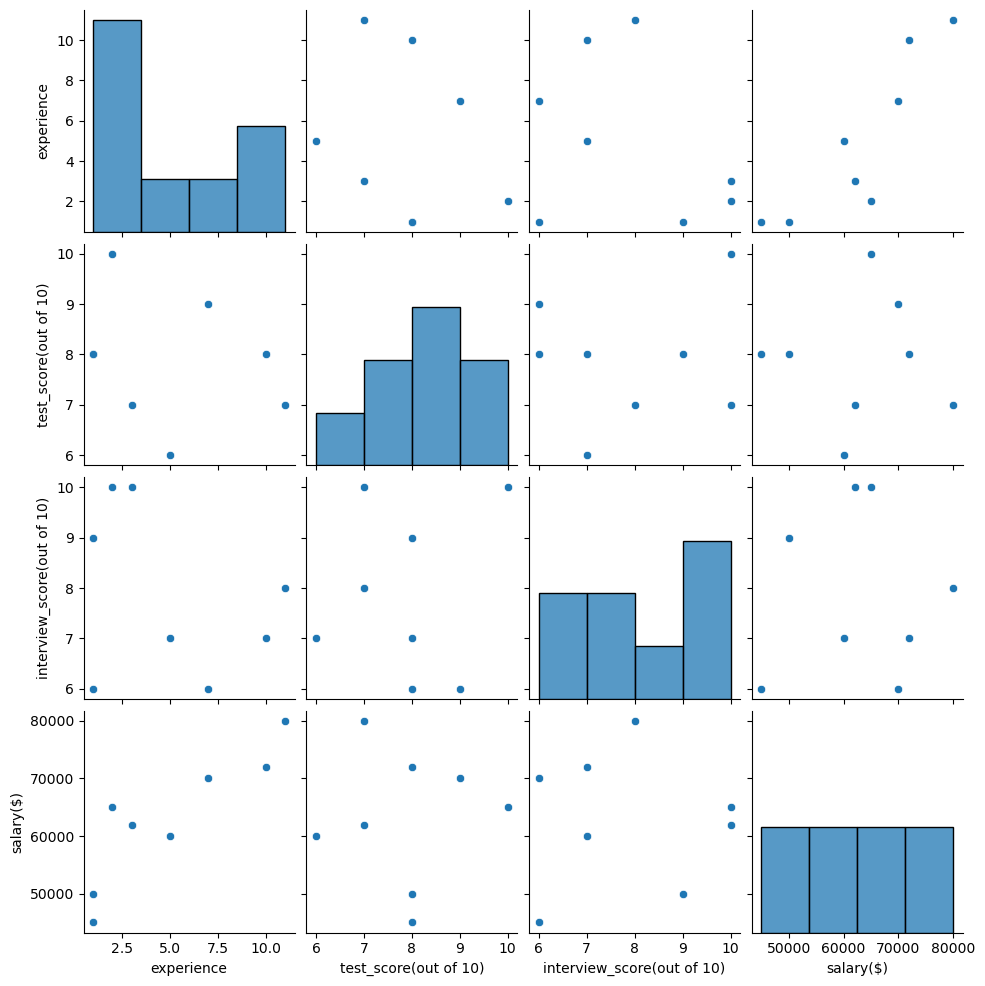

In [12]:
sns.pairplot(hr)
plt.show()

In [13]:
hr.corr()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
experience,1.000000,-0.231302,-0.329194,0.880450
test_score(out of 10),-0.231302,1.000000,0.130871,0.009965
interview_score(out of 10),-0.329194,0.130871,1.000000,0.037820
salary($),0.880450,0.009965,0.037820,1.000000


we can see from both pairplot and correlation that the highest correlation is between salary and experience.

In [14]:
# split the data into X and y

X = hr.drop('salary($)', axis = 1)
y = hr['salary($)']

In [15]:
X

,experience,test_score(out of 10),interview_score(out of 10)
0,1,8.0,9
1,1,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,8.0,7
7,11,7.0,8


In [16]:
# let's build our model

# Initiate the model

model = LinearRegression()

In [17]:
# let us train our training data

model.fit(X, y)

LinearRegression()

In [18]:
# let's make predictions
# if experience is 2, test score is 9, interview score is 6
# what will be the predicted salary?

model.predict([[2, 9, 6]])

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([51375.54064819])

In [19]:
# let's make more predictions
# if experience is 12, test score is 10, interview score is 10
# what will be the predicted salary?

model.predict([[12, 10, 10]])

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93523.67002192])

In [20]:
# let's make more predictions
# if experience is 0, test score is 10, interview score is 10
# what will be the predicted salary?
model.predict([[0, 10, 10]])

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([57149.29460636])

In [21]:
model.score(X, y)

0.935300761353276